# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
df_train = pd.read_csv("./Dataset/train.csv")
df_test = pd.read_csv("./Dataset/test.csv")

## About Dataset
Dataset :

⏱️ **trip_duration**: How long did the journey last?[in Seconds] <br>
🛣️ **distance_traveled**: How far did the taxi travel?[in Km] <br>
🧑 **num_of_passengers**: How many passengers were in the taxi? <br>
💵 **fare**: What's the base fare for the journey?[In INR] <br>
💲 **tip**: How much did the driver receive in tips?[In INR] <br>
🎀 **miscellaneous_fees**: Were there any additional charges during the trip?e.g. tolls, convenience fees, GST etc.[In INR] <br>
💰 **total_fare**: The grand total for the ride (this is your prediction target!).[In INR] <br>
⚡ **surge_applied**: Was there a peak hours (Surge Price)? Yes or no? <br>

In [3]:
df_train.shape

(209673, 8)

In [4]:
df_train.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [5]:
df_train.sample(5)

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
65839,917.0,1.45,1.0,78.75,21,6.150,105.900,0
141467,964.0,8.05,1.0,131.25,0,26.625,157.875,1
169644,849.0,2.96,1.0,82.50,0,6.000,88.500,0
140365,272.0,0.95,2.0,33.75,0,9.750,43.500,0
111222,654.0,3.15,1.0,71.25,20,30.700,121.950,1


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [7]:
df_train.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

In [8]:
df_train.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


In [9]:
df_train.duplicated().sum()

4325

In [10]:
df_train.drop_duplicates(inplace=True)

In [11]:
df_train['trip_duration'] = df_train['trip_duration']/3600  ## To convert the trip duration in hours.

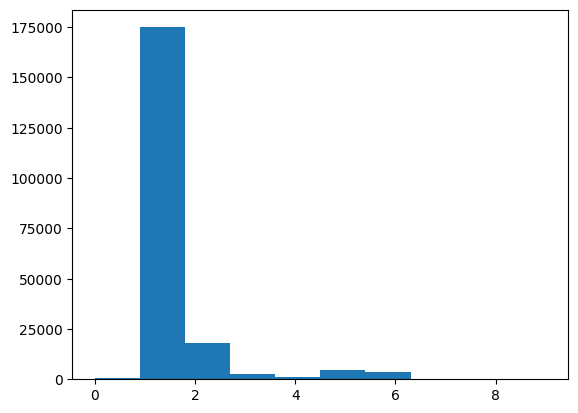

In [12]:
plt.hist(df_train['num_of_passengers'])
plt.show()

<AxesSubplot: xlabel='num_of_passengers', ylabel='total_fare'>

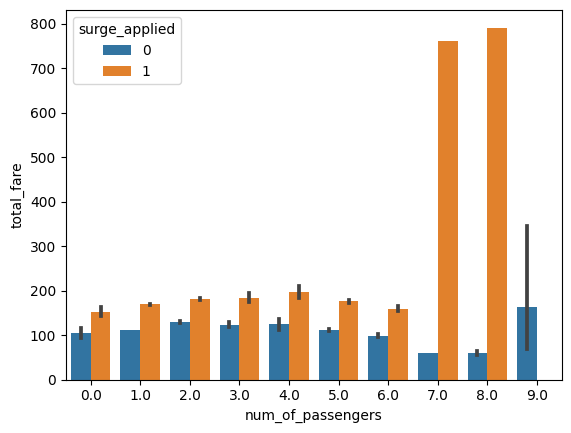

In [13]:
sns.barplot(y = df_train["total_fare"],x = df_train["num_of_passengers"],hue=df_train["surge_applied"])

<AxesSubplot: xlabel='surge_applied', ylabel='total_fare'>

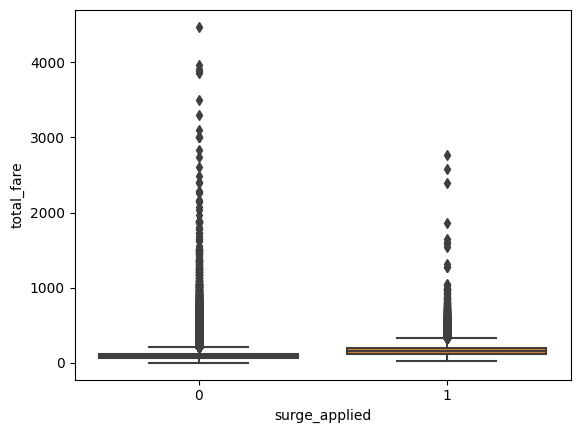

In [14]:
sns.boxplot(y = df_train["total_fare"],x = df_train["surge_applied"])

In [15]:
## By the above graph we can say that Single number passengers are more travelling.

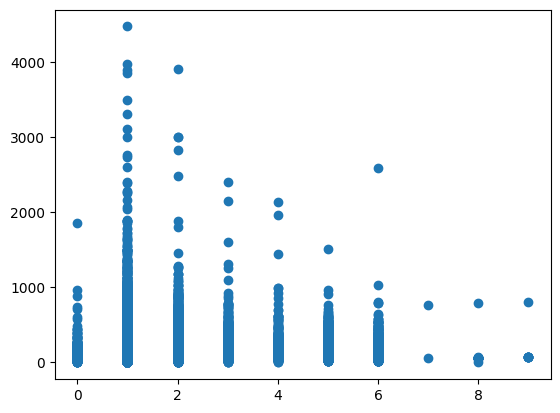

In [16]:
plt.scatter(df_train['num_of_passengers'] ,df_train['total_fare'])

<AxesSubplot: xlabel='tip', ylabel='Count'>

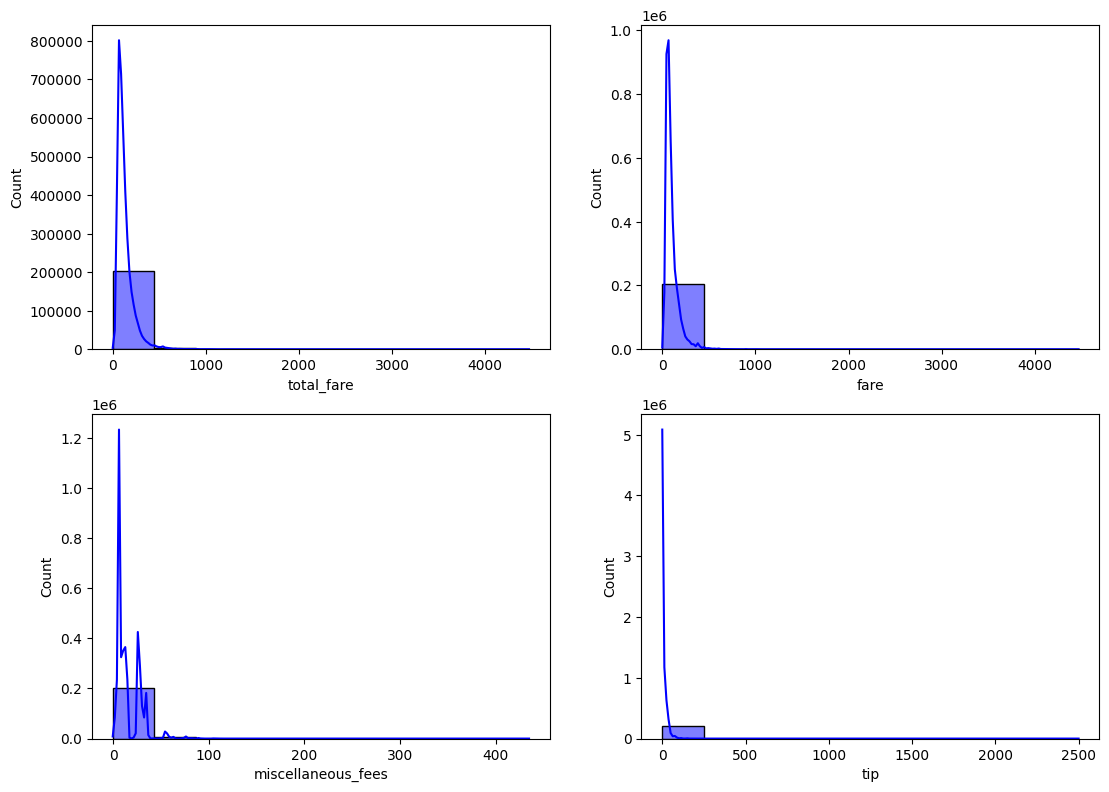

In [17]:
a4_dims = (13, 9.27)
fig, axs = plt.subplots(ncols=2,nrows=2,figsize = a4_dims)
sns.histplot(df_train['total_fare'],kde=True,color='blue',bins=10,ax=axs[0][0])
sns.histplot(df_train['fare'],kde=True,color='blue',bins=10,ax=axs[0][1])
sns.histplot(df_train['miscellaneous_fees'],kde=True,color='blue',bins=10,ax=axs[1][0])
sns.histplot(df_train['tip'],kde=True,color='blue',bins=10,ax=axs[1][1])

<AxesSubplot: >

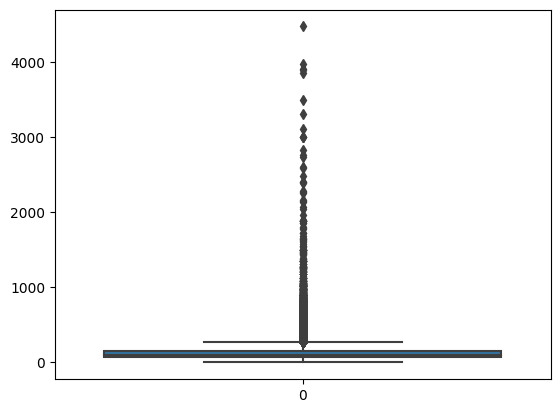

In [18]:
sns.boxplot(df_train['total_fare'])

#### From Above plot we can say that data has too many outliers.

In [19]:
## Covariance
df_train.cov()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
trip_duration,1.795825,0.963469,-0.003111,17.189343,0.755182,0.754585,18.699111,0.017044
distance_traveled,0.963469,16009.391207,-0.054909,389.548628,34.363803,34.336208,458.248638,0.301151
num_of_passengers,-0.003111,-0.054909,0.882205,0.784739,0.079848,0.075221,0.939808,0.001224
fare,17.189343,389.548628,0.784739,7420.599543,526.186164,320.241235,8267.026943,5.478979
tip,0.755182,34.363803,0.079848,526.186164,420.573084,81.943563,1028.702811,2.173058
miscellaneous_fees,0.754585,34.336208,0.075221,320.241235,81.943563,159.305002,561.489801,4.066866
total_fare,18.699111,458.248638,0.939808,8267.026943,1028.702811,561.489801,9857.219554,11.718903
surge_applied,0.017044,0.301151,0.001224,5.478979,2.173058,4.066866,11.718903,0.204120


<AxesSubplot: >

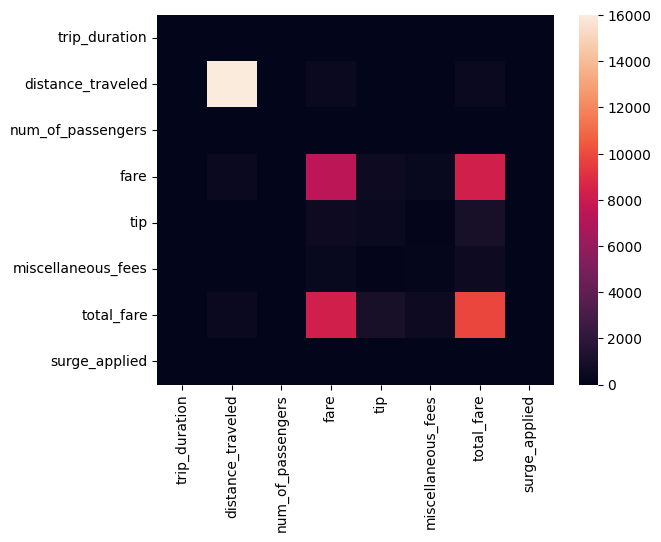

In [20]:
sns.heatmap(df_train.cov())

### From the above Covariance Matrix, we can only predict that Total Fare and Fare has Postive relationship Between them but it is not standardized measure, so we can calculate the Correlation.

In [21]:
df_train.corr()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
trip_duration,1.000000,0.005682,-0.002471,0.148904,0.027479,0.044613,0.140544,0.028151
distance_traveled,0.005682,1.000000,-0.000462,0.035740,0.013243,0.021501,0.036478,0.005268
num_of_passengers,-0.002471,-0.000462,1.000000,0.009699,0.004145,0.006345,0.010078,0.002884
fare,0.148904,0.035740,0.009699,1.000000,0.297851,0.294539,0.966613,0.140779
tip,0.027479,0.013243,0.004145,0.297851,1.000000,0.316577,0.505233,0.234535
miscellaneous_fees,0.044613,0.021501,0.006345,0.294539,0.316577,1.000000,0.448074,0.713185
total_fare,0.140544,0.036478,0.010078,0.966613,0.505233,0.448074,1.000000,0.261256
surge_applied,0.028151,0.005268,0.002884,0.140779,0.234535,0.713185,0.261256,1.000000


<AxesSubplot: >

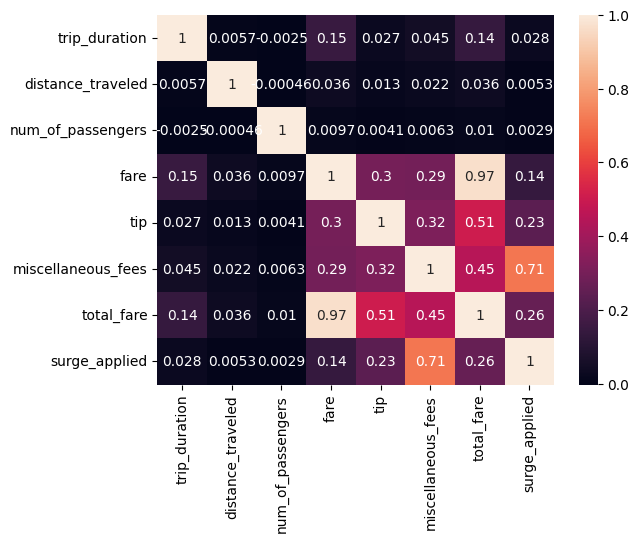

In [22]:
sns.heatmap(df_train.corr(),annot=True,fmt='.2g')

<AxesSubplot: xlabel='miscellaneous_fees', ylabel='surge_applied'>

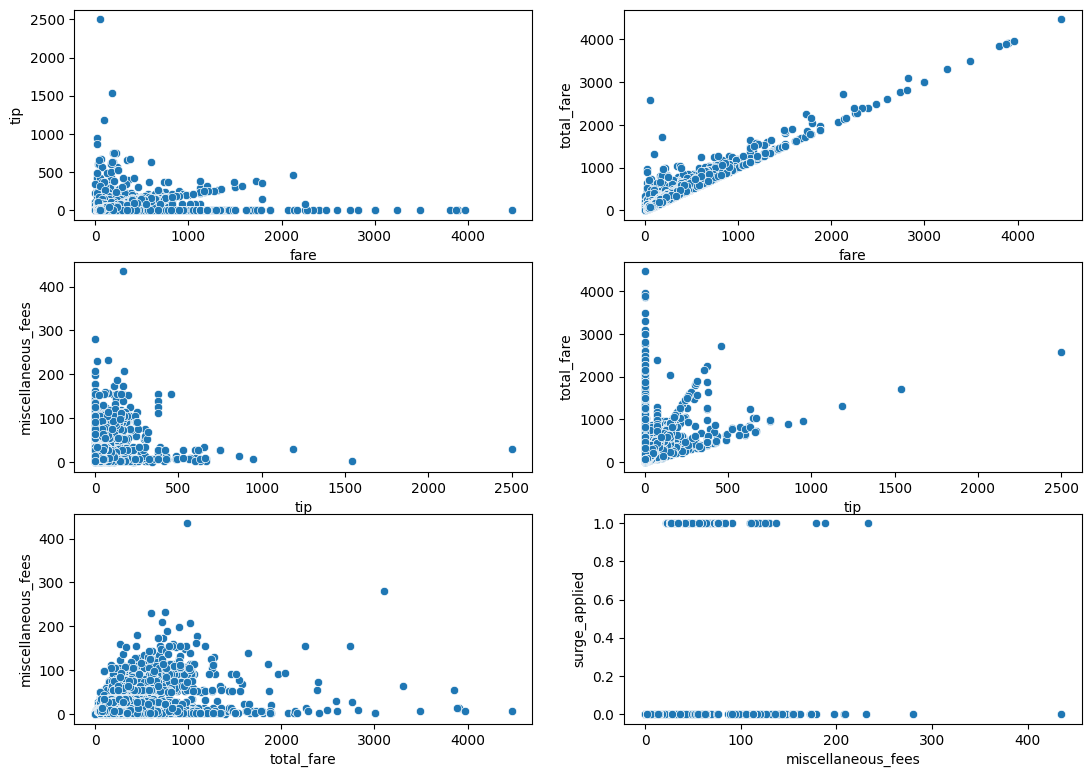

In [23]:
a4_dims = (13, 9.27)
fig, axs = plt.subplots(ncols=2,nrows=3,figsize = a4_dims)
sns.scatterplot(x = df_train['fare'],y = df_train['tip'],ax=axs[0][0])
sns.scatterplot(x = df_train['fare'],y = df_train['total_fare'],ax=axs[0][1])
sns.scatterplot(x = df_train['tip'],y = df_train['miscellaneous_fees'],ax=axs[1][0])
sns.scatterplot(x = df_train['tip'],y = df_train['total_fare'],ax=axs[1][1])
sns.scatterplot(x = df_train['total_fare'],y = df_train['miscellaneous_fees'],ax=axs[2][0])
sns.scatterplot(x = df_train['miscellaneous_fees'],y = df_train['surge_applied'],ax=axs[2][1])


## Pandas Profiling Report

In [24]:
from ydata_profiling import ProfileReport
prof = ProfileReport(df_train)
prof.to_file(output_file='taxi_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot: >

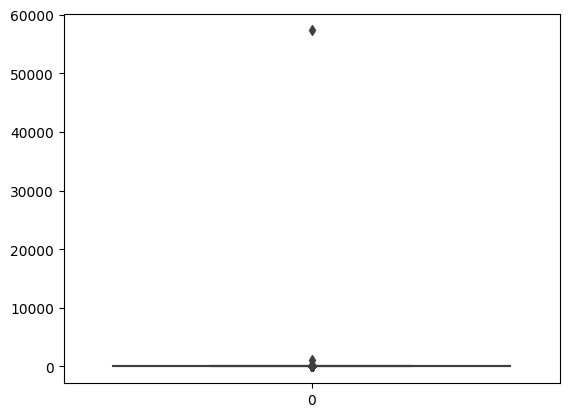

In [25]:
sns.boxplot(df_train['distance_traveled'])

In [26]:
df = df_train

In [27]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
curr_rows = df.shape[0]
exec_rows = 0
i = 1
while(curr_rows!=exec_rows): ### we are using while loop here to iterate again and again on the dataset to remove all the outliers.
    curr_rows = exec_rows
    print("Iteration Number: ",i)
    print("Old Shape: ", df.shape)
    Q1 = df['distance_traveled'].quantile(0.25)
    Q3 = df['distance_traveled'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    # Create arrays of Boolean values indicating the outlier rows

    upper_array = np.where(df['distance_traveled']>=upper)[0]
    lower_array = np.where(df['distance_traveled']<=lower)[0]

    # Removing the outliers
    df.reset_index(inplace = True,drop = True)
    if(len(upper_array)!=0):
        df.drop(index=upper_array, inplace=True,axis = 0)
        df.reset_index(drop=True,inplace=True)
    if(len(lower_array)!=0):
        df.drop(index=lower_array, inplace=True)
        df.reset_index(drop=True,inplace=True)
    df.reset_index(inplace = True,drop = True)
    # Print the new shape of the DataFrame
    print("New Shape: ", df.shape)
    exec_rows = df.shape[0]
    i = i + 1

Iteration Number:  1
Old Shape:  (205348, 8)
New Shape:  (189000, 8)
Iteration Number:  2
Old Shape:  (189000, 8)
New Shape:  (180510, 8)
Iteration Number:  3
Old Shape:  (180510, 8)
New Shape:  (176520, 8)
Iteration Number:  4
Old Shape:  (176520, 8)
New Shape:  (174532, 8)
Iteration Number:  5
Old Shape:  (174532, 8)
New Shape:  (173670, 8)
Iteration Number:  6
Old Shape:  (173670, 8)
New Shape:  (173480, 8)
Iteration Number:  7
Old Shape:  (173480, 8)
New Shape:  (173217, 8)
Iteration Number:  8
Old Shape:  (173217, 8)
New Shape:  (172955, 8)
Iteration Number:  9
Old Shape:  (172955, 8)
New Shape:  (172955, 8)


<AxesSubplot: >

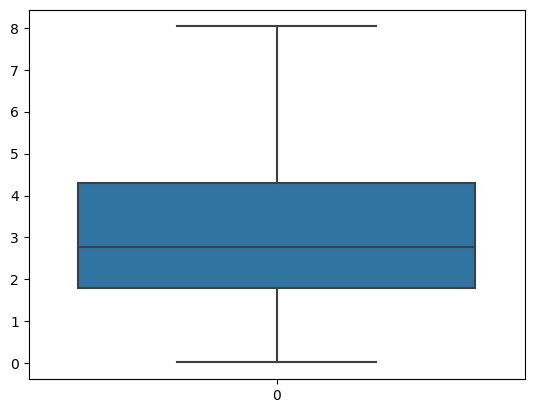

In [28]:
sns.boxplot(df['distance_traveled'])

In [29]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
curr_rows = df.shape[0]
exec_rows = 0
i = 1
while(curr_rows!=exec_rows): ### we are using while loop here to iterate again and again on the dataset to remove all the outliers.
    curr_rows = exec_rows
    print("Iteration Number: ",i)
    print("Old Shape: ", df.shape)
    Q1 = df['trip_duration'].quantile(0.25)
    Q3 = df['trip_duration'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    # Create arrays of Boolean values indicating the outlier rows

    upper_array = np.where(df['trip_duration']>=upper)[0]
    lower_array = np.where(df['trip_duration']<=lower)[0]

    # Removing the outliers
    df.reset_index(inplace = True,drop = True)
    if(len(upper_array)!=0):
        df.drop(index=upper_array, inplace=True,axis = 0)
        df.reset_index(drop=True,inplace=True)
    if(len(lower_array)!=0):
        df.drop(index=lower_array, inplace=True)
        df.reset_index(drop=True,inplace=True)
    df.reset_index(inplace = True,drop = True)
    # Print the new shape of the DataFrame
    print("New Shape: ", df.shape)
    exec_rows = df.shape[0]
    i = i + 1

Iteration Number:  1
Old Shape:  (172955, 8)
New Shape:  (166810, 8)
Iteration Number:  2
Old Shape:  (166810, 8)
New Shape:  (165409, 8)
Iteration Number:  3
Old Shape:  (165409, 8)
New Shape:  (165069, 8)
Iteration Number:  4
Old Shape:  (165069, 8)
New Shape:  (164991, 8)
Iteration Number:  5
Old Shape:  (164991, 8)
New Shape:  (164991, 8)


<AxesSubplot: >

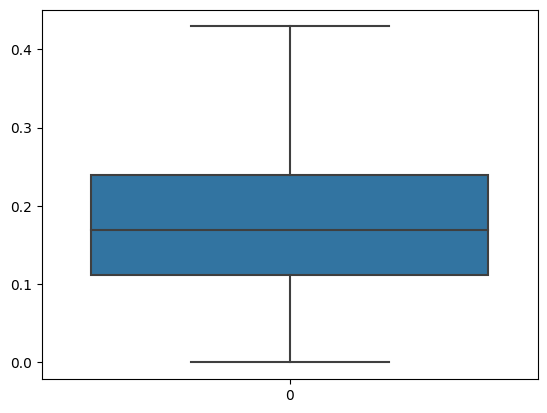

In [30]:
sns.boxplot(df['trip_duration'])

In [31]:
df

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,0.207778,2.75,1.0,75.00,24,6.300,105.300,0
1,0.329722,3.43,1.0,105.00,24,13.200,142.200,0
2,0.202778,3.12,1.0,71.25,0,26.625,97.875,1
3,0.186389,5.63,3.0,90.00,0,9.750,99.750,0
4,0.091389,2.09,1.0,45.00,12,13.200,70.200,0
...,...,...,...,...,...,...,...,...
164986,0.202500,2.49,1.0,75.00,16,6.200,97.200,0
164987,0.098333,1.24,1.0,45.00,0,6.000,51.000,0
164988,0.121667,1.29,1.0,48.75,12,34.575,95.325,1
164989,0.158611,2.82,1.0,63.75,0,6.000,69.750,0


<AxesSubplot: >

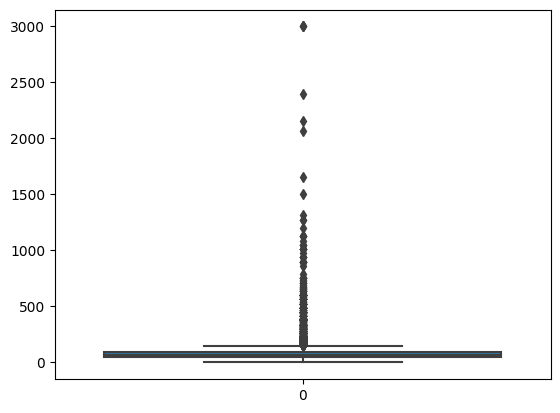

In [32]:
sns.boxplot(df['fare'])

In [33]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
curr_rows = df.shape[0]
exec_rows = 0
i = 1
while(curr_rows!=exec_rows): ### we are using while loop here to iterate again and again on the dataset to remove all the outliers.
    curr_rows = exec_rows
    print("Iteration Number: ",i)
    print("Old Shape: ", df.shape)
    Q1 = df['tip'].quantile(0.25)
    Q3 = df['tip'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    # Create arrays of Boolean values indicating the outlier rows

    upper_array = np.where(df['tip']>=upper)[0]
    lower_array = np.where(df['tip']<=lower)[0]

    # Removing the outliers
    df.reset_index(inplace = True,drop = True)
    if(len(upper_array)!=0):
        df.drop(index=upper_array, inplace=True,axis = 0)
        df.reset_index(drop=True,inplace=True)
    if(len(lower_array)!=0):
        df.drop(index=lower_array, inplace=True)
        df.reset_index(drop=True,inplace=True)
    df.reset_index(inplace = True,drop = True)
    # Print the new shape of the DataFrame
    print("New Shape: ", df.shape)
    exec_rows = df.shape[0]
    i = i + 1

Iteration Number:  1
Old Shape:  (164991, 8)
New Shape:  (163758, 8)
Iteration Number:  2
Old Shape:  (163758, 8)
New Shape:  (163758, 8)


In [34]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
curr_rows = df.shape[0]
exec_rows = 0
i = 1
while(curr_rows!=exec_rows): ### we are using while loop here to iterate again and again on the dataset to remove all the outliers.
    curr_rows = exec_rows
    print("Iteration Number: ",i)
    print("Old Shape: ", df.shape)
    Q1 = df['total_fare'].quantile(0.25)
    Q3 = df['total_fare'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    # Create arrays of Boolean values indicating the outlier rows

    upper_array = np.where(df['total_fare']>=upper)[0]
    lower_array = np.where(df['total_fare']<=lower)[0]

    # Removing the outliers
    df.reset_index(inplace = True,drop = True)
    if(len(upper_array)!=0):
        df.drop(index=upper_array, inplace=True,axis = 0)
        df.reset_index(drop=True,inplace=True)
    if(len(lower_array)!=0):
        df.drop(index=lower_array, inplace=True)
        df.reset_index(drop=True,inplace=True)
    df.reset_index(inplace = True,drop = True)
    # Print the new shape of the DataFrame
    print("New Shape: ", df.shape)
    exec_rows = df.shape[0]
    i = i + 1

Iteration Number:  1
Old Shape:  (163758, 8)
New Shape:  (162562, 8)
Iteration Number:  2
Old Shape:  (162562, 8)
New Shape:  (162548, 8)
Iteration Number:  3
Old Shape:  (162548, 8)
New Shape:  (162523, 8)
Iteration Number:  4
Old Shape:  (162523, 8)
New Shape:  (162523, 8)


In [35]:
from ydata_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='taxi_report1.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot: >

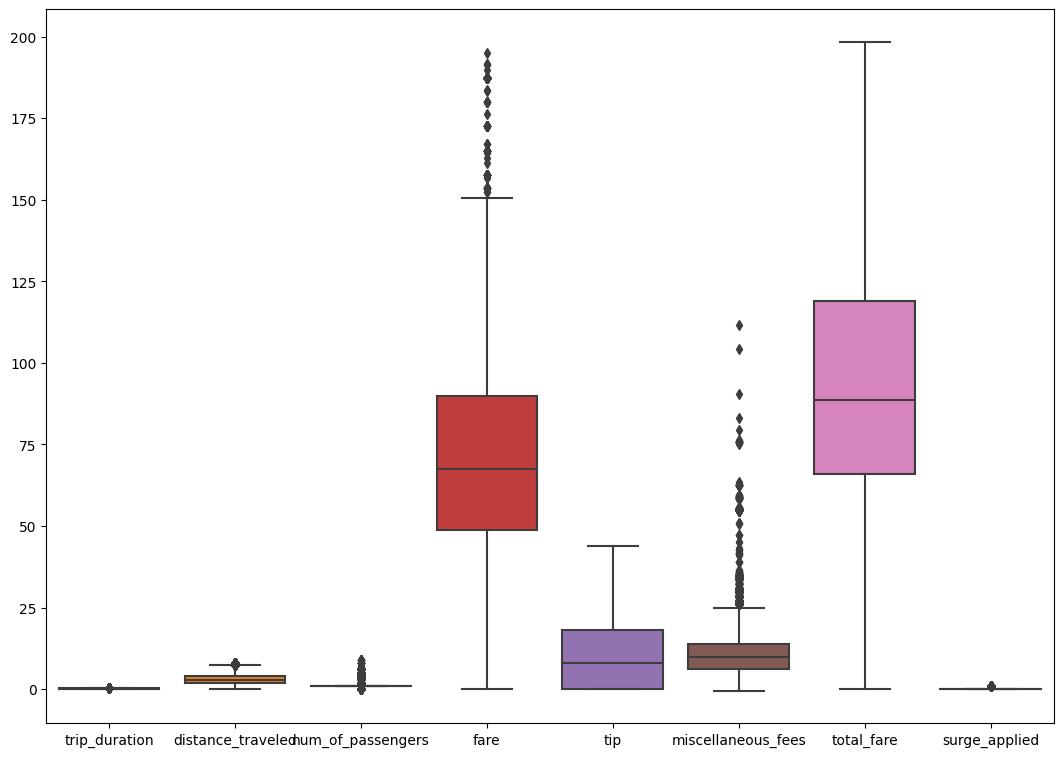

In [36]:
a4_dims = (13, 9.27)
fig, axs = plt.subplots(figsize = a4_dims)
sns.boxplot(df)

<AxesSubplot: >

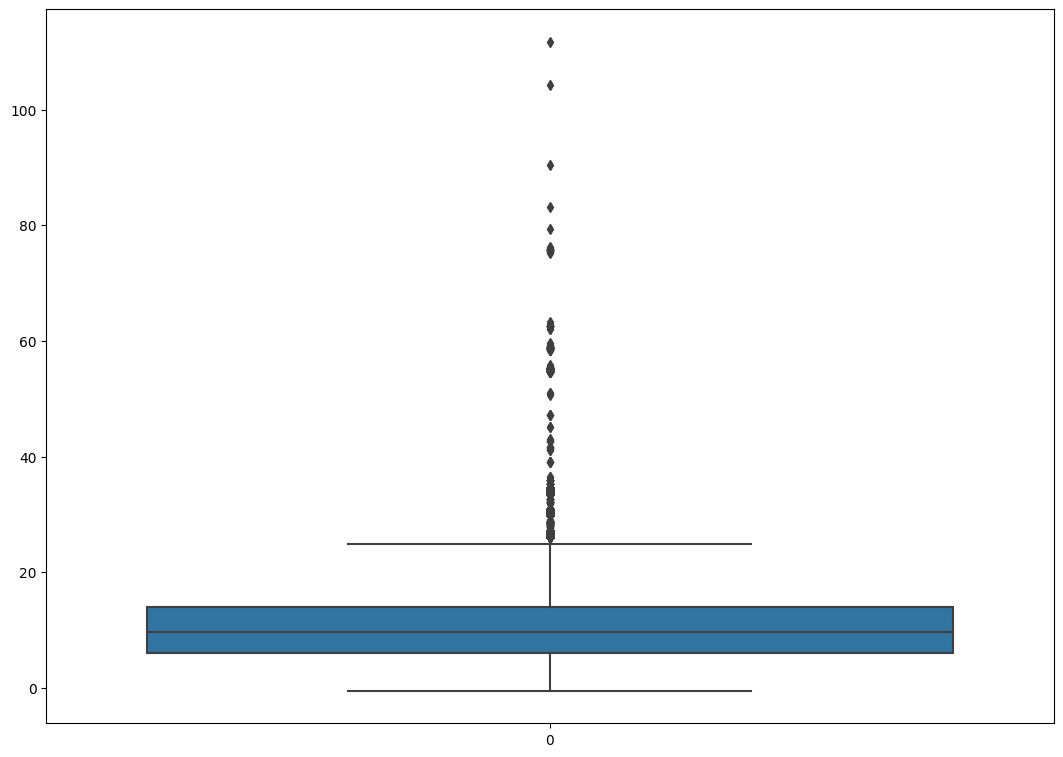

In [37]:
a4_dims = (13, 9.27)
fig, axs = plt.subplots(figsize = a4_dims)
sns.boxplot(df['miscellaneous_fees'])

<AxesSubplot: xlabel='miscellaneous_fees', ylabel='Count'>

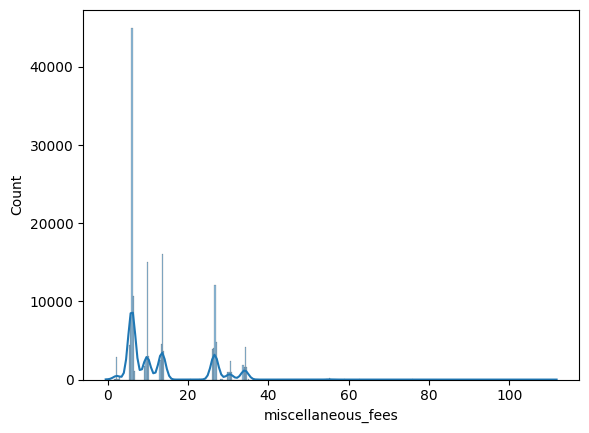

In [38]:
sns.histplot(df['miscellaneous_fees'],kde=True)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['fare','total_fare'], axis=1),
                                                    df['fare'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((113766, 6), (48757, 6))

In [40]:
X_train

,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,surge_applied
94115,0.296944,5.26,6.0,34,30.200,1
130286,0.298611,5.09,1.0,38,33.625,1
93352,0.200278,3.32,2.0,32,2.650,0
142404,0.135278,2.24,1.0,0,9.750,0
69553,0.218889,2.08,1.0,11,26.875,1
...,...,...,...,...,...,...
97639,0.095000,1.56,1.0,6,5.625,0
95939,0.159167,6.42,1.0,21,10.200,0
152315,0.196111,1.11,1.0,0,6.000,0
117952,0.060556,0.55,1.0,8,27.100,1


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [43]:
X_train_scaled

,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,surge_applied
0,1.299312,1.329605,4.994422,2.291117,1.755923,1.765048
1,1.317885,1.228072,-0.310590,2.672953,2.112502,1.765048
2,0.222053,0.170941,0.750412,2.100199,-1.112328,-0.566557
3,-0.502310,-0.474089,-0.310590,-0.954488,-0.373142,-0.566557
4,0.429457,-0.569649,-0.310590,0.095561,1.409755,1.765048
...,...,...,...,...,...,...
113761,-0.951167,-0.880219,-0.310590,-0.381734,-0.802598,-0.566557
113762,-0.236091,2.022414,-0.310590,1.050150,-0.326292,-0.566557
113763,0.175620,-1.148981,-0.310590,-0.954488,-0.763557,-0.566557
113764,-1.335018,-1.483441,-0.310590,-0.190816,1.433180,1.765048


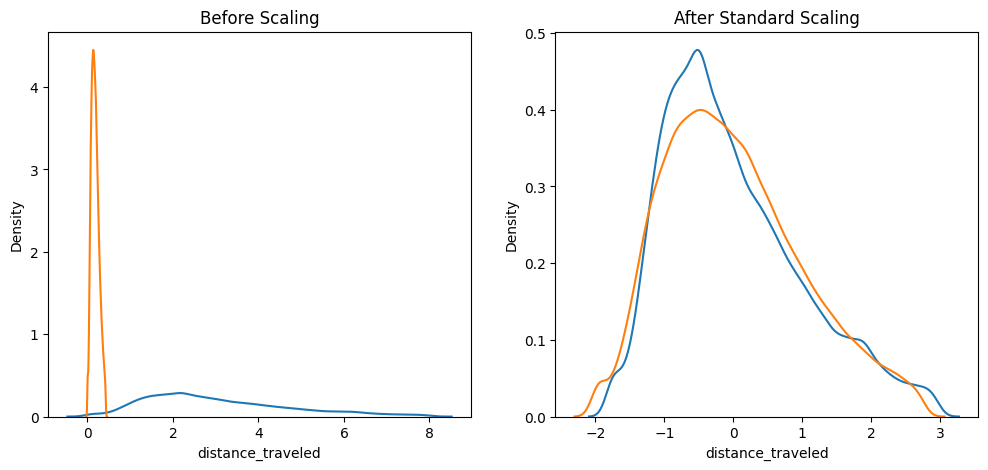

In [44]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['distance_traveled'], ax=ax1)
sns.kdeplot(X_train['trip_duration'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['distance_traveled'], ax=ax2)
sns.kdeplot(X_train_scaled['trip_duration'], ax=ax2)
plt.show()

In [74]:
X_train_scaled

,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,surge_applied
0,1.299312,1.329605,4.994422,2.291117,1.755923,1.765048
1,1.317885,1.228072,-0.310590,2.672953,2.112502,1.765048
2,0.222053,0.170941,0.750412,2.100199,-1.112328,-0.566557
3,-0.502310,-0.474089,-0.310590,-0.954488,-0.373142,-0.566557
4,0.429457,-0.569649,-0.310590,0.095561,1.409755,1.765048
...,...,...,...,...,...,...
113761,-0.951167,-0.880219,-0.310590,-0.381734,-0.802598,-0.566557
113762,-0.236091,2.022414,-0.310590,1.050150,-0.326292,-0.566557
113763,0.175620,-1.148981,-0.310590,-0.954488,-0.763557,-0.566557
113764,-1.335018,-1.483441,-0.310590,-0.190816,1.433180,1.765048


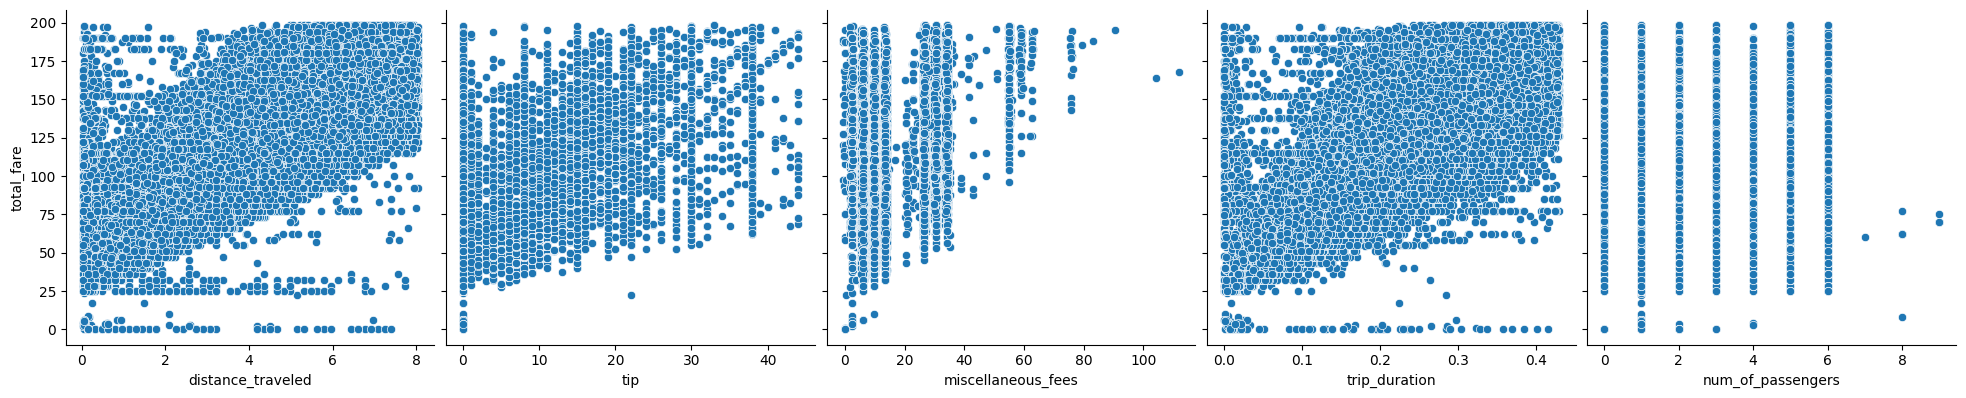

In [76]:
# Visualization
sns.pairplot(df_train, x_vars=['distance_traveled', 'tip','miscellaneous_fees','trip_duration','num_of_passengers'], y_vars = 'total_fare', height = 4, kind = 'scatter')

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
df1 = X_train_scaled.iloc[:,0:5]   ## Never take tagret variable in calculating VIF
print(df1.head())
for i in range(df1.shape[1]):
    vif.append(variance_inflation_factor(df1,i))
vif

   trip_duration  distance_traveled  num_of_passengers       tip  \
0       1.299312           1.329605           4.994422  2.291117   
1       1.317885           1.228072          -0.310590  2.672953   
2       0.222053           0.170941           0.750412  2.100199   
3      -0.502310          -0.474089          -0.310590 -0.954488   
4       0.429457          -0.569649          -0.310590  0.095561   

   miscellaneous_fees  
0            1.755923  
1            2.112502  
2           -1.112328  
3           -0.373142  
4            1.409755  


[2.353796612780243,
 2.4181793891640035,
 1.0003624901167434,
 1.1866652671161153,
 1.180221924545593]

In [47]:
X_train_dist = X_train_scaled['distance_traveled']

In [48]:
import statsmodels.api as sm
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train_dist)

X_train_sm.reset_index(drop = True)
y_train.reset_index(drop=True,inplace=True)

In [49]:
X_train_sm

,const,distance_traveled
0,1.0,1.329605
1,1.0,1.228072
2,1.0,0.170941
3,1.0,-0.474089
4,1.0,-0.569649
...,...,...
113761,1.0,-0.880219
113762,1.0,2.022414
113763,1.0,-1.148981
113764,1.0,-1.483441


In [50]:
y_train

0         105.00
1         105.00
2         127.50
3          60.00
4          71.25
           ...  
113761     45.00
113762     97.50
113763     63.75
113764     30.00
113765    108.75
Name: fare, Length: 113766, dtype: float64

In [51]:
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [52]:
X_test_dist = X_test_scaled['distance_traveled']
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test_dist)
X_test_sm.reset_index(drop = True)
y_test.reset_index(drop=True,inplace=True)
# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [53]:
print("Slope is:- ",lr.params[1])
print("Intercept is:- ",lr.params[0])

Slope is:-  23.812233817671277
Intercept is:-  71.29457966351988


In [54]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                 3.635e+05
Date:                Sun, 31 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:00:17   Log-Likelihood:            -4.5601e+05
No. Observations:              113766   AIC:                         9.120e+05
Df Residuals:                  113764   BIC:                         9.120e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                71.2946      0.03

In [55]:
df_train

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,0.207778,2.75,1.0,75.00,24,6.300,105.300,0
1,0.329722,3.43,1.0,105.00,24,13.200,142.200,0
2,0.202778,3.12,1.0,71.25,0,26.625,97.875,1
3,0.186389,5.63,3.0,90.00,0,9.750,99.750,0
4,0.091389,2.09,1.0,45.00,12,13.200,70.200,0
...,...,...,...,...,...,...,...,...
162518,0.202500,2.49,1.0,75.00,16,6.200,97.200,0
162519,0.098333,1.24,1.0,45.00,0,6.000,51.000,0
162520,0.121667,1.29,1.0,48.75,12,34.575,95.325,1
162521,0.158611,2.82,1.0,63.75,0,6.000,69.750,0


In [56]:
X_train_1 = X_train.copy()
X_test_1 = X_test.copy()
X_train_1 = sm.add_constant(X_train_1)
X_train_1.reset_index(drop = True)
X_test_1 = sm.add_constant(X_test_1)
X_test_1.reset_index(drop = True)

,const,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,surge_applied
0,1.0,0.046667,1.45,1.0,10,10.250,0
1,1.0,0.142500,2.16,1.0,14,33.700,1
2,1.0,0.283333,4.35,1.0,20,5.875,0
3,1.0,0.143889,2.80,1.0,0,9.750,0
4,1.0,0.053889,1.03,1.0,22,10.250,0
...,...,...,...,...,...,...,...
48752,1.0,0.123056,2.46,1.0,0,6.000,0
48753,1.0,0.225833,4.81,1.0,8,29.875,1
48754,1.0,0.102222,2.54,1.0,8,9.250,0
48755,1.0,0.120556,4.72,1.0,0,2.250,0


In [57]:
X_train_1.reset_index(drop = True,inplace=True)
X_test_1.reset_index(drop = True,inplace=True)

In [58]:
X_train_1

,const,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,surge_applied
0,1.0,0.296944,5.26,6.0,34,30.200,1
1,1.0,0.298611,5.09,1.0,38,33.625,1
2,1.0,0.200278,3.32,2.0,32,2.650,0
3,1.0,0.135278,2.24,1.0,0,9.750,0
4,1.0,0.218889,2.08,1.0,11,26.875,1
...,...,...,...,...,...,...,...
113761,1.0,0.095000,1.56,1.0,6,5.625,0
113762,1.0,0.159167,6.42,1.0,21,10.200,0
113763,1.0,0.196111,1.11,1.0,0,6.000,0
113764,1.0,0.060556,0.55,1.0,8,27.100,1


In [59]:
lr = sm.OLS(y_train, X_train_1).fit()

In [60]:
y_pred = lr.predict(X_test_1)

In [61]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                 1.374e+05
Date:                Sun, 31 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:00:21   Log-Likelihood:            -4.1757e+05
No. Observations:              113766   AIC:                         8.352e+05
Df Residuals:                  113759   BIC:                         8.352e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 22.4446      0

In [62]:


from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [64]:
predictions = rf_model.predict(X_test)
predictions

array([35.175 , 56.85  , 96.9375, ..., 52.425 , 96.0975, 87.7125])

In [67]:
from sklearn.metrics import r2_score

In [70]:
X_test_1

,const,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,surge_applied
0,1.0,0.046667,1.45,1.0,10,10.250,0
1,1.0,0.142500,2.16,1.0,14,33.700,1
2,1.0,0.283333,4.35,1.0,20,5.875,0
3,1.0,0.143889,2.80,1.0,0,9.750,0
4,1.0,0.053889,1.03,1.0,22,10.250,0
...,...,...,...,...,...,...,...
48752,1.0,0.123056,2.46,1.0,0,6.000,0
48753,1.0,0.225833,4.81,1.0,8,29.875,1
48754,1.0,0.102222,2.54,1.0,8,9.250,0
48755,1.0,0.120556,4.72,1.0,0,2.250,0


In [71]:
r2_score(y_test, predictions)

0.9515681662911178